# Visualize the dataset

['setosa' 'versicolor' 'virginica']
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1              

e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

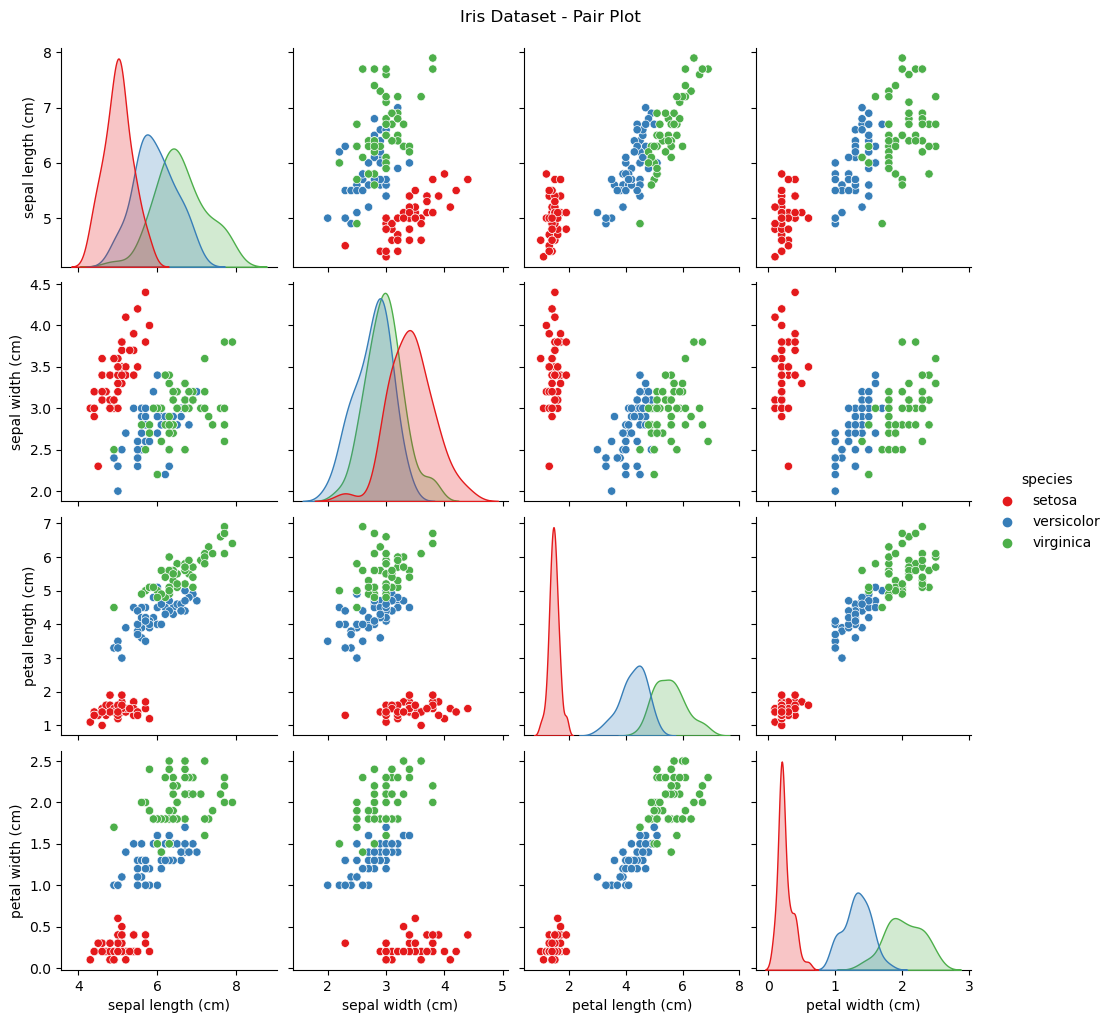

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np


# Load the iris dataset
iris = datasets.load_iris()
X = iris.data       # Features
y = iris.target     # Class labels
feature_names = iris.feature_names
class_names = iris.target_names
print(class_names)
# Convert to a DataFrame for easier visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
print(df)
# Map numeric labels to species names
num2species = {i: species for i, species in enumerate(class_names)}
df['species'] = df['species'].map(num2species)
print(df['species'])

# Plot a pairplot to visualize relationships between features
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle("Iris Dataset - Pair Plot", y=1.02)
plt.show()


# Classification with k nearest neighbors

In [8]:
class_counts = df['species'].value_counts()
print("\nNumber of instances per class:")
print(class_counts)


Number of instances per class:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [9]:
#Shuffle and split with 80% in training and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [10]:
#Train a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
k = 3 #number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
print("k-NN classifier trained with k =", k)

k-NN classifier trained with k = 3


In [11]:
#Predict on the test set
y_pred = knn.predict(X_test)

#Evaluation using precision, recall, f1-score
from sklearn.metrics import precision_score, recall_score, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, y_pred, average=None)  # per-class precision
recall = recall_score(y_test, y_pred, average=None)        # per-class recall


for idx, class_name in enumerate(iris.target_names):
    print(f"Class '{class_name}':")
    print(f"    Precision: {precision[idx]:.2f}")
    print(f"    Recall: {recall[idx]:.2f}")


macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
print("\nOverall (macro) Precision:", macro_precision)
print("Overall (macro) Recall:", macro_recall)




Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Class 'setosa':
    Precision: 1.00
    Recall: 1.00
Class 'versicolor':
    Precision: 0.91
    Recall: 1.00
Class 'virginica':
    Precision: 1.00
    Recall: 0.90

Overall (macro) Precision: 0.9696969696969697
Overall (macro) Recall: 0.9666666666666667


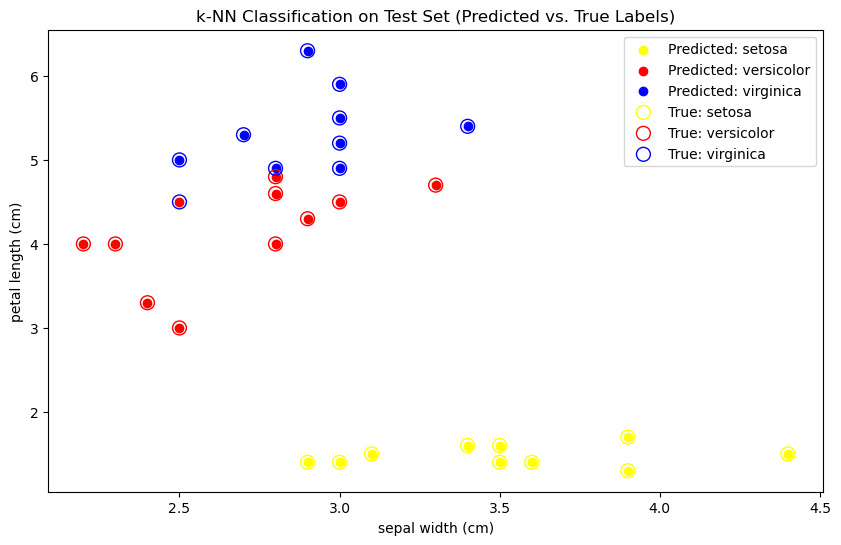

In [12]:
plt.figure(figsize=(10, 6))

# Scatter plot of the test set, coloring by predicted class
colors = ['yellow', 'red', 'blue']
first_feature = 1
second_feature = 2
for i, class_name in enumerate(iris.target_names):
    plt.scatter(X_test[y_pred == i, first_feature], X_test[y_pred == i, second_feature], label=f"Predicted: {class_name}", marker='o', color = colors[i])

# Scatter plot of the test set with true labels as x marks
for i, class_name in enumerate(iris.target_names):
    plt.scatter(X_test[y_test == i, first_feature], X_test[y_test == i, second_feature], label=f"True: {class_name}", marker='o', facecolors='none', edgecolor = colors[i], s=100, alpha=1)

plt.xlabel(iris.feature_names[first_feature])
plt.ylabel(iris.feature_names[second_feature])
plt.legend(loc='best')
plt.title("k-NN Classification on Test Set (Predicted vs. True Labels)")
plt.show()





# Clustering using k-means

e:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


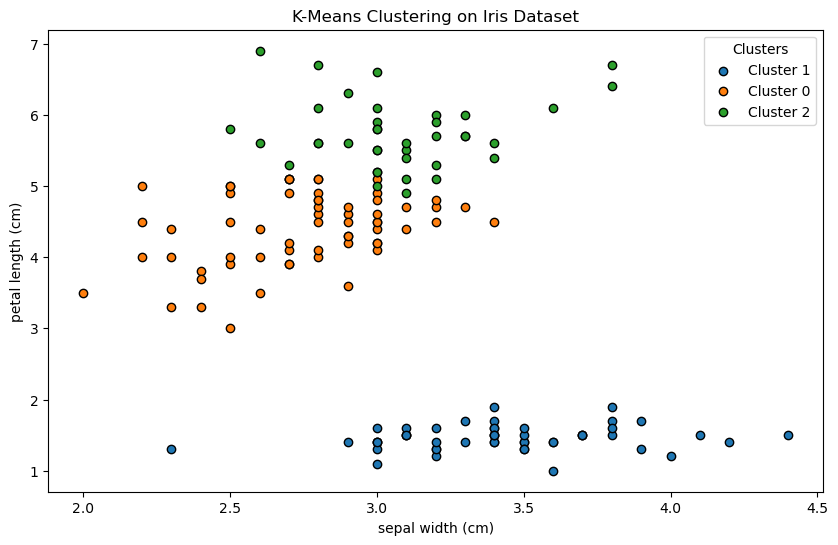

In [13]:
X = iris.data       # Features
y = iris.target     # Class labels
# Apply KMeans clustering
from sklearn.cluster import KMeans
k = 3  # Number of clusters (3 species)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)



df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = kmeans.labels_ #Will give the cluster number for each data point

# Scatter plot for the first two features with cluster coloring
plt.figure(figsize=(10, 6))

# Plot each cluster separately to add to the legend
for cluster in df['Cluster'].unique():
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data.iloc[:, first_feature], clustered_data.iloc[:, second_feature], label=f'Cluster {cluster}', edgecolor='k') #iloc does index by number instead of name

plt.xlabel(iris.feature_names[first_feature])
plt.ylabel(iris.feature_names[second_feature])
plt.title("K-Means Clustering on Iris Dataset")
plt.legend(title="Clusters")
plt.show()

In [14]:
from sklearn.metrics import homogeneity_score, completeness_score

y_pred = np.array([0, 1, 2])
y = np.array([0, 1, 1])
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
print(f"Homogeneity Score: {homogeneity:.3f}")
print(f"Completeness Score: {completeness:.3f}")

y_pred = np.array([0, 0, 1, 1, 2, 2])
y = np.array([0, 1, 2, 3, 4, 5])
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
print(f"Homogeneity Score: {homogeneity:.3f}")
print(f"Completeness Score: {completeness:.3f}")

'''
y_pred = kmeans.labels_ 
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
print(f"Homogeneity Score: {homogeneity:.3f}")
print(f"Completeness Score: {completeness:.3f}")
'''


Homogeneity Score: 1.000
Completeness Score: 0.579
Homogeneity Score: 0.613
Completeness Score: 1.000


'\ny_pred = kmeans.labels_ \nhomogeneity = homogeneity_score(y, y_pred)\ncompleteness = completeness_score(y, y_pred)\nprint(f"Homogeneity Score: {homogeneity:.3f}")\nprint(f"Completeness Score: {completeness:.3f}")\n'

### Regression


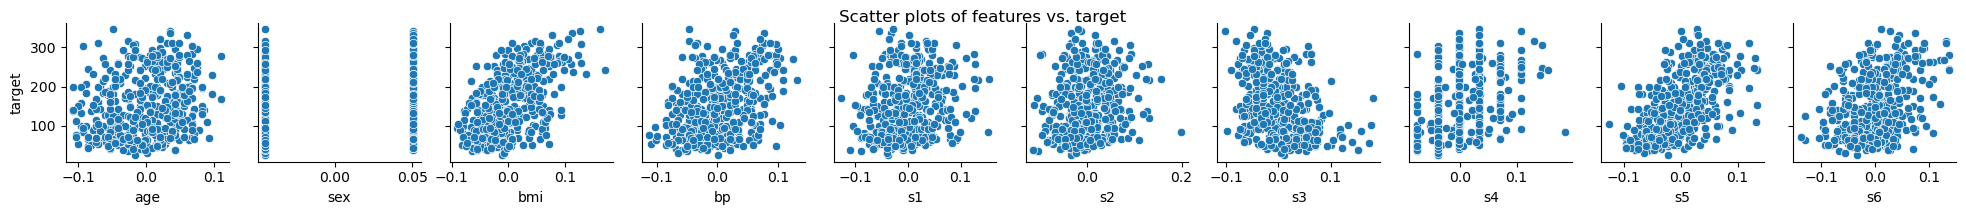

In [17]:
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y #Greater values of target indicate more severe diabetes

sns.pairplot(df, y_vars='target', x_vars=diabetes.feature_names, kind="scatter", height=2)
plt.suptitle("Scatter plots of features vs. target", y=1.02)
plt.show()



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R-squared Score: {r2:.3f}")




ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (e:\Anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

Actual vs. Predicted Plot: This plot shows the true values (actual disease progression) on the x-axis and the predicted values (from the regression model) on the y-axis. Ideally, the points should lie close to the red dashed line (where predicted values equal actual values), indicating a strong prediction.

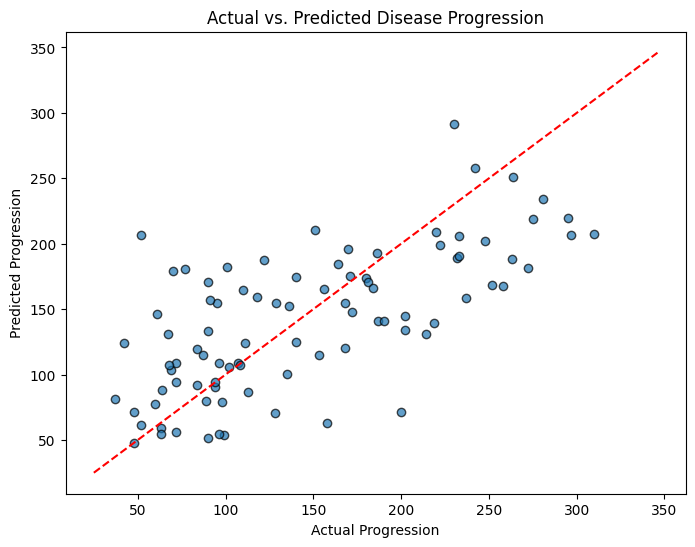

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.title("Actual vs. Predicted Disease Progression")
plt.show()